# Linear Transformation and Linear Algebra

## Linear transformation

1. Create a data set of points in 2D that constitute a square. Use the same techniques as those introduced in class for building the cube from points along the edges.
2. Make a plot of the square and give points belonging to each side a different color.
3. Apply the horizintal shear transformation with a shear parameter $m=1$. Plot the transformed point set.
4. Apply the rotation  transformation with $\Theta = 45\deg$ in the counterclockwise direction. Plot the transformed point set.

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as mlp
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


In [2]:
n=20
c=1.
pencil = np.linspace(-c,c,n)
upper = c * ones(n)
lower = -c + zeros(n)

In [41]:
#print(pencil, "\n", upper, "\n", lower)

In [4]:
line = array([pencil, upper, lower])
# reshape to have points list needed for transformation
one_edge = reshape(line.ravel(order='F'),(n,3))

In [42]:
#line

In [43]:
#ravel will flattened the array
#arguement is for deciding how to flatten the array.
# if C, then it will flatten by column --> DOWN
# if F, then it will flatten by row --> ACROSS

#line.ravel(order='F')

In [44]:
#first argument is how many indices you want, ie how many arrays
#second argument is how many elements in each array
## we want two coordinates in each point --> 2D

#reshape(line.ravel(order='F'),(n,3))

In [8]:
# how to build all of the edges?
dummy_sides = []
r=['u','l']
for j in r:
        dummy_sides.append(['p',j])

In [9]:
dummy_sides

[['p', 'u'], ['p', 'l']]

In [10]:
# and the other_dummy_sides
for this in dummy_sides:
    for i in [1]:
        print(roll(array(this),i))

['u' 'p']
['l' 'p']


In [11]:
square_sides = []
r=[upper,lower]
for j in r:
        square_sides.append([pencil,j])

In [45]:
#square_sides

In [13]:
# but first add sides with pencil in y and z coordinate
other_square_sides=[]
for this in square_sides:
    for i in [1]:
        other_square_sides.append(roll(array(this),i,axis=0))

In [46]:
#other_square_sides

In [47]:
# each of these sides have to be reshaped to be an array of 3D points

#reshape(array(square_sides[0]).ravel(order='F'),(n,2))

In [16]:
square_sides_points = []
for this in square_sides+other_square_sides:
    square_sides_points.append(reshape(array(this).ravel(order='F'),(n,2)))

In [48]:
#square_sides_points

In [18]:
def transp(points):
    return array(points).T[0], array(points).T[1];

In [102]:
#multiply n by 4 because there are 4 sides to a square
square_vecs = reshape(array(square_sides_points),(4*n,2))

In [49]:
#square_vecs

In [21]:
x1, y1 = transp(square_vecs)

In [24]:
# shear mapping y-direction
sy = 1
T1 = matrix([[1,sy],[0,1]])

In [25]:
vecs1 = square_vecs
Ta = T1
# transformation:
trans_vec = []
for i in range(len(vecs1)):
    this_tv = Ta.dot(vecs1[i]).A1
    trans_vec.append(this_tv)

# transpose to make plotable arrays
x2, y2 = transp(trans_vec)
print(T1)

[[1 1]
 [0 1]]


In [26]:
#rotation counterclockwise 45 degrees
theta = 3*np.pi/4
T2 = matrix([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
print(T2)

[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [27]:
vecs2 = square_vecs
Tb = T2
# transformation:
trans_vec = []
for i in range(len(vecs2)):
    this_tv = Tb.dot(vecs2[i]).A1
    trans_vec.append(this_tv)

# transpose to make plotable arrays
x3, y3 = transp(trans_vec)

In [28]:
# scaling
t = 1.75
T3 = matrix([[t,0],[0,t]])

In [101]:
vecs3 = square_vecs
Tc = T3
# transformation:
trans_vec = []
for i in range(len(vecs3)):
    this_tv = Tc.dot(vecs3[i]).A1
    #print(this_tv)
    trans_vec.append(this_tv)
    
# transpose to make plotable arrays
x4, y4 = transp(trans_vec)

In [105]:
len(x4)

80

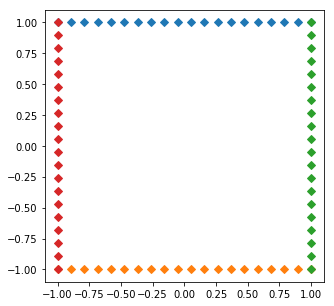

In [173]:
# messing around with plots
plt.figure(figsize=(5,5))
count = 20
start = 0
for i in range(4):
    plt.plot(x1[start:count], y1[start:count], 'D')
    start = count;
    count+= 20;

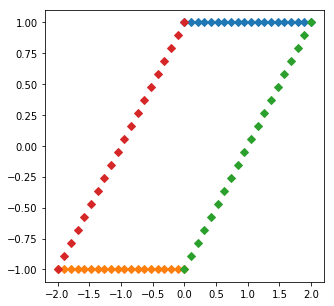

In [172]:
# messing around with plots
plt.figure(figsize=(5,5))
count = 20
start = 0
for i in range(4):
    plt.plot(x2[start:count], y2[start:count], 'D')
    start = count;
    count+= 20;

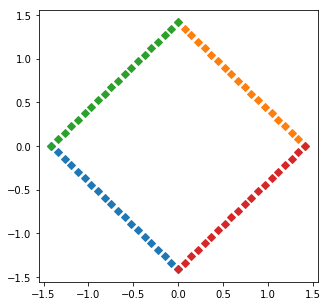

In [171]:
# messing around with plots
plt.figure(figsize=(5,5))
count = 20
start = 0
for i in range(4):
    plt.plot(x3[start:count], y3[start:count], 'D')
    start = count;
    count+= 20;

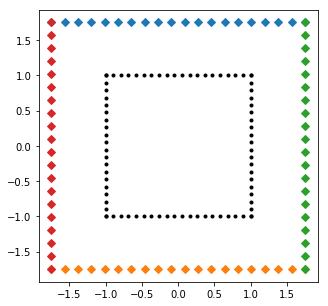

In [176]:
# messing around with plots
plt.figure(figsize=(5,5))
count = 20
start = 0
for i in range(4):
    plt.plot(x4[start:count], y4[start:count], 'D')
    start = count;
    count+= 20;
plt.plot(x1,y1, '.', color = 'black')

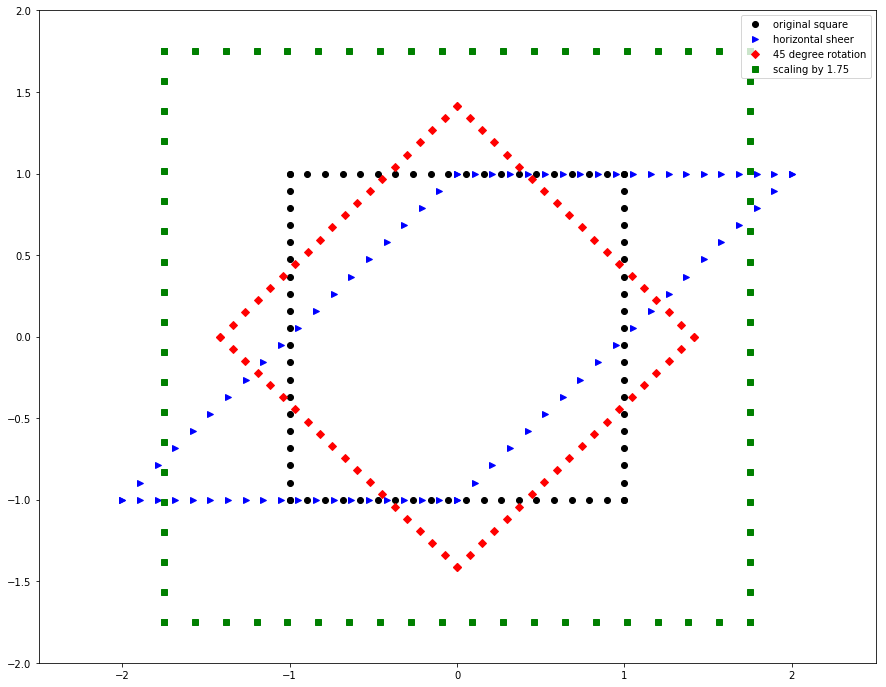

In [160]:
##plotting time
plt.figure(figsize = (15,12))
plt.plot(x1,y1, 'o', color = 'black', label = 'original square') #original
plt.plot(x2,y2, '>', color = 'blue', label = 'horizontal sheer') #sheer by m=1 horizontally
plt.plot(x3,y3, 'D', color = 'red', label = '45 degree rotation') #rotate counterclockwise 45 degrees
plt.plot(x4,y4, 's', color = 'green', label = 'scaling by 1.75') #scale square by 2
xlim(-2.5,2.5)
ylim(-2,2)
legend(loc=0)

## Gaussian elimination

1. Create your own linear algebra module `linalg` that can be imported into your notebook (see Part.I unit 4). Add the `dot_prod` function from class to the module. Create a tester cell that demonstrates the function.
2. Add a function that takes a matrix (as an array of arrays) and a vector which together represent a set of equations ($\vec{u} = {\bf A} \cdot \vec{v}$) as input. The function solves the equations, i.e. returns $\vec{v}$. Use the Gaussian elemination technique. Following the steps from class (Part.III, unit 3).
3. Your function should have some checks to prevent the user from misusing the function in the most obvious way. Think about and comment on other not so obvious ways in which your function could fail. 

In [ ]:
def gausselim(A,u):
    '''Gaussian elimination with backsubstution
    
    This function solves the equation u = A * v, where v, u vectors 
    of length N and A a NxN matrix.
    
    input: A, u
    output solution vector v
    '''
    
    your code here ....

    return v

Use the gaussian elimination function as well as a numpy method to solve the following system of equations:
$$\begin{eqnarray*}
 3 v_1 +  v_2 + 7 v_3 &= 0 \\ 
 6 v_1 -2  v_2 +  v_3 &= 8 \\
 -5 v_1 + 1 v_2 + 3 v_3 &= 1
\end{eqnarray*}$$
